#### TASK 1

Implement a linear regression model to predict the price of houses 
based on theri square footage and the number of bedrooms and bathroos

In [6]:
import pandas as pd
import numpy as np

In [7]:
np.random.seed(42)

num_samples = 1000

In [8]:
square_footage = np.random.randint(800, 3500, size=num_samples)
bedrooms = np.random.randint(1, 6, size=num_samples)
bathrooms = np.random.randint(1, 4, size=num_samples)

In [9]:
random_noise = np.random.normal(0,20000,size = num_samples)
prices = 100 * square_footage + 20000 * bedrooms + random_noise

In [10]:
data = pd.DataFrame({
    'Square Footage': square_footage,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Price': prices
})

In [11]:
data.to_csv('house_prices_dataset.csv', index=False)
print(data.head())

   Square Footage  Bedrooms  Bathrooms          Price
0            1660         5          1  251324.240524
1            2094         5          2  310121.267829
2            1930         5          1  299950.607523
3            1895         4          2  292770.175359
4            2438         4          3  329103.110546


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
data = pd.read_csv('house_prices_dataset.csv')

In [14]:
data

,Square Footage,Bedrooms,Bathrooms,Price
0,1660,5,1,251324.240524
1,2094,5,2,310121.267829
2,1930,5,1,299950.607523
3,1895,4,2,292770.175359
4,2438,4,3,329103.110546
...,...,...,...,...
995,1614,2,2,197846.120458
996,3075,1,1,314307.954630
997,2700,2,2,295902.630924
998,3063,2,3,311702.043365


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 200x500 with 0 Axes>

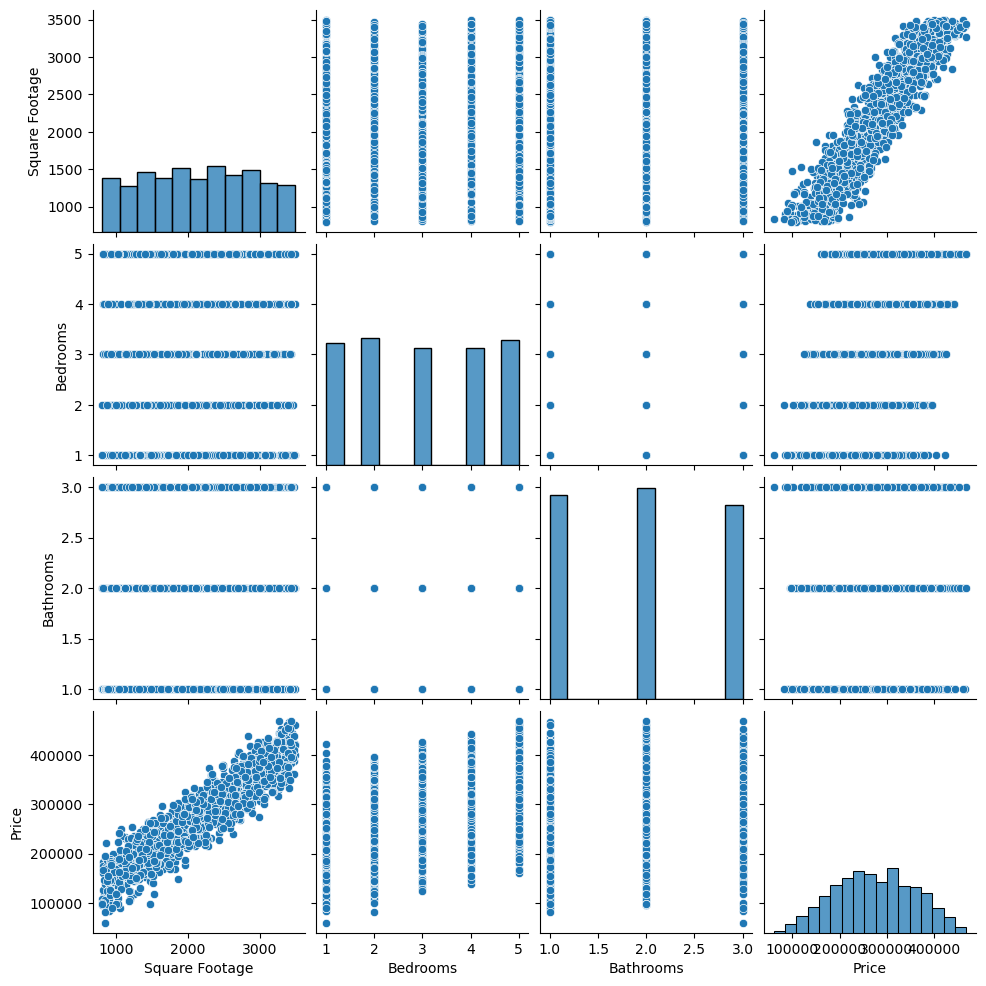

In [29]:
plt.figure(figsize=(2,5))
sns.pairplot(data)

In [15]:
X = data[['Square Footage', 'Bedrooms', 'Bathrooms']]
y = data['Price']
     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.score(X_train,y_train)

0.9443207417710163

In [21]:
model.score(X_test,y_test)

0.9454225293749093

In [16]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 382303690.00067306


In [17]:
example_house = [[1800, 3, 2]]
predicted_price = model.predict(example_house)
print("Predicted Price:", predicted_price[0])

Predicted Price: 240177.89538170362


E:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

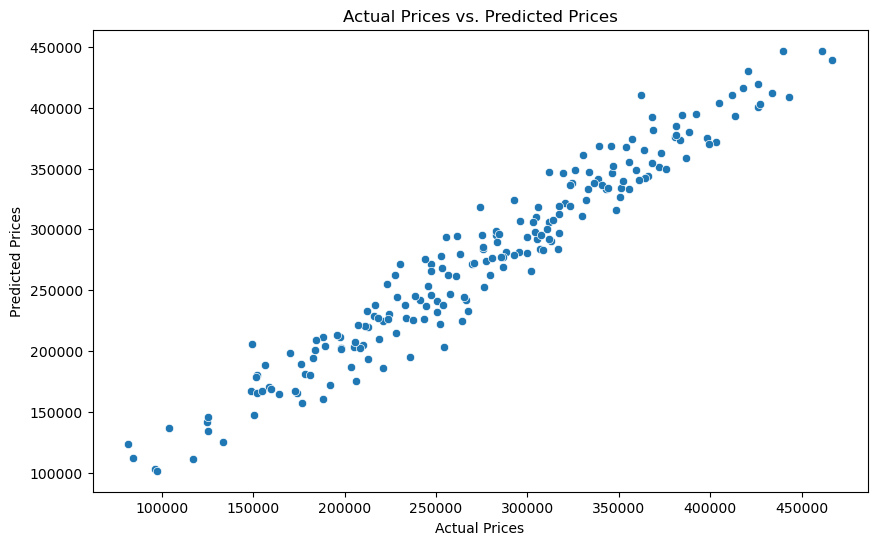

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()